# The model

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading variables

In [2]:
data1 = pd.read_csv('/Users/alderaan/Documents/PROJECTS_INSIGHT/data_files/Data_Final/sample_for_modeling.csv')
data = data1 #to keep an extra copy when needed.

In [3]:
data = data1.iloc[:,1:] #remove index

## Manual binning
Better than non-manual binning

In [4]:
# Annual income
data['annual_inc_1'] = np.where(data['annual_inc'] < 50000, 1, 0)
data['annual_inc_2'] = np.where(
    (data['annual_inc'] >= 50000) & (data['annual_inc'] < 85000), 1, 0)
data['annual_inc_3'] = np.where(
    (data['annual_inc'] >= 58000) & (data['annual_inc'] < 130000), 1, 0)
data['annual_inc_4'] = np.where(data['annual_inc'] > 130000, 1, 0)

data.loc[data['annual_inc_1'] == 1, 'annual_inc_bin_value'] = int(-11)
data.loc[data['annual_inc_2'] == 1, 'annual_inc_bin_value'] = int(-2)
data.loc[data['annual_inc_3'] == 1, 'annual_inc_bin_value'] = int(10)
data.loc[data['annual_inc_4'] == 1, 'annual_inc_bin_value'] = int(22)

# Revolving balance
data['revolving_balance_1'] = np.where(data['revol_bal'] < 21000, 1, 0)
data['revolving_balance_2'] = np.where(
    (data['revol_bal'] >= 21000) & (data['revol_bal'] < 32000), 1, 0)
data['revolving_balance_3'] = np.where(
    (data['revol_bal'] >= 32000) & (data['revol_bal'] < 45000), 1, 0)
data['revolving_balance_4'] = np.where(data['revol_bal'] > 45000, 1, 0)

data.loc[data['revolving_balance_1'] == 1, 'revol_bal_bin_value'] = int(1)
data.loc[data['revolving_balance_2'] == 1, 'revol_bal_bin_value'] = int(-2)
data.loc[data['revolving_balance_3'] == 1, 'revol_bal_bin_value'] = int(-6)
data.loc[data['revolving_balance_4'] == 1, 'revol_bal_bin_value'] = int(-11)

# Number of inquiries in the last 6 months
data['inquiries_6months_1'] = np.where(data['inq_last_6mths'] < 1, 1, 0)
data['inquiries_6months_2'] = np.where(
    (data['inq_last_6mths'] >= 1) & (data['inq_last_6mths'] < 2), 1, 0)
data['inquiries_6months_3'] = np.where(data['inq_last_6mths'] > 2, 1, 0)

data.loc[data['inquiries_6months_1'] == 1, 'inq_last_6mths_bin_value'] = int(15)
data.loc[data['inquiries_6months_2'] == 1, 'inq_last_6mths_bin_value'] = int(10)
data.loc[data['inquiries_6months_3'] == 1, 'inq_last_6mths_bin_value'] = int(-37)

# Loan amount
data['loan_amnt_1'] = np.where(data['loan_amnt'] < 7000, 1, 0)
data['loan_amnt_2'] = np.where(
    (data['loan_amnt'] >= 7000) & (data['loan_amnt'] < 11000), 1, 0)
data['loan_amnt_3'] = np.where(
    (data['loan_amnt'] >= 11000) & (data['loan_amnt'] < 35000), 1, 0)
data['loan_amnt_4'] = np.where(data['loan_amnt'] > 35000, 1, 0)

data.loc[data['loan_amnt_1'] == 1, 'loan_amnt_bin_value'] = int(22)
data.loc[data['loan_amnt_2'] == 1, 'loan_amnt_bin_value'] = int(7)
data.loc[data['loan_amnt_3'] == 1, 'loan_amnt_bin_value'] = int(-4)
data.loc[data['loan_amnt_4'] == 1, 'loan_amnt_bin_value'] = int(-11)

# Debt to income
data['debt_to_income_1'] = np.where(data['dti'] < 13, 1, 0)
data['debt_to_income_2'] = np.where(
    (data['dti'] >= 13) & (data['dti'] < 19), 1, 0)
data['debt_to_income_3'] = np.where(
    (data['dti'] >= 19) & (data['dti'] < 24), 1, 0)
data['debt_to_income_4'] = np.where(
    (data['dti'] >= 24) & (data['dti'] < 27), 1, 0)
data['debt_to_income_5'] = np.where(data['dti'] > 27, 1, 0)

data.loc[data['debt_to_income_1'] == 1, 'dti_bin_value'] = int(16)
data.loc[data['debt_to_income_2'] == 1, 'dti_bin_value'] = int(11)
data.loc[data['debt_to_income_2'] == 1, 'dti_bin_value'] = int(4)
data.loc[data['debt_to_income_4'] == 1, 'dti_bin_value'] = int(-5)
data.loc[data['debt_to_income_5'] == 1, 'dti_bin_value'] = int(-15)


# Home ownership
data = pd.concat([data.drop('home_ownership', axis=1),pd.get_dummies(data['home_ownership'])], axis=1)
data.loc[data['MORTGAGE'] == 1, 'housing_bin_value'] = int(-11)
data.loc[data['OWN'] == 1, 'housing_bin_value'] = int(0)
data.loc[data['RENT'] == 1, 'housing_bin_value'] = int(12)

# Purpose
data = pd.concat([data.drop('purpose', axis=1),pd.get_dummies(data['purpose'])], axis=1)
data.loc[data['home_improvement'] == 1, 'purpose_bin_value'] = int(-8)
data.loc[data['credit_card'] == 1, 'purpose_bin_value'] = int(-15)
data.loc[data['car'] == 1, 'purpose_bin_value'] = int(-15)
data.loc[data['debt_consolidation'] == 1, 'purpose_bin_value'] = int(-15)
data.loc[data['educational'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['home_improvement'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['major_purchase'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['medical'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['moving'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['other'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['renewable_energy'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['small_business'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['vacation'] == 1, 'purpose_bin_value'] = int(5)
data.loc[data['wedding'] == 1, 'purpose_bin_value'] = int(5)


In [40]:
col_list = list(data)
list_to_sum_score =['annual_inc_bin_value', 'revol_bal_bin_value', 'inq_last_6mths_bin_value',
                    'loan_amnt_bin_value', 'dti_bin_value', 'housing_bin_value','purpose_bin_value']
data['score'] = (data[list_to_sum_score].sum(axis=1))+250

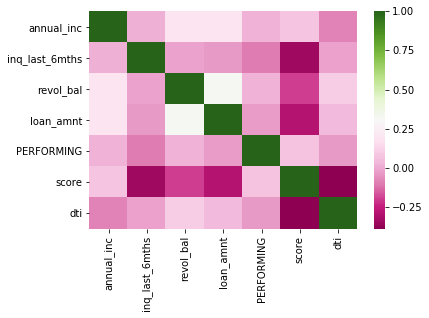

In [41]:
features_limited_values_score = data[{
    'PERFORMING', 'score', 'loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal'}]
sns.heatmap(features_limited_values_score.corr(), cmap="PiYG")


Select the columns needed for the model

In [42]:
data = data[{'PERFORMING', 'int_rate', 'loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 
       'revol_bal', 'annual_inc_1', 'annual_inc_2', 'annual_inc_3', 'annual_inc_4',
       'revolving_balance_1', 'revolving_balance_2', 'revolving_balance_3', 
       'revolving_balance_4', 'inquiries_6months_1', 'inquiries_6months_2',
       'inquiries_6months_3', 'loan_amnt_1', 'loan_amnt_2', 'loan_amnt_3',
       'loan_amnt_4', 'debt_to_income_1', 'debt_to_income_2',
       'debt_to_income_3', 'debt_to_income_4', 'debt_to_income_5', 
       'MORTGAGE', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 
       'annual_inc_bin_value', 'revol_bal_bin_value',
       'inq_last_6mths_bin_value', 'loan_amnt_bin_value', 'dti_bin_value',
       'housing_bin_value', 'purpose_bin_value', 'score' }].reindex()

In [43]:
print(data.shape)
data2=data.dropna() 
print(data2.shape)
#data2.to_csv('/Users/alderaan/Documents/PROJECTS_INSIGHT/data_files/Data_Final/binned_data.csv')

(2376343, 52)
(1675462, 52)


In [9]:
data2 = pd.read_csv('/Users/alderaan/Documents/PROJECTS_INSIGHT/data_files/Data_Final/binned_data.csv')
#sanity checks
data2.reindex();
print(data2.info());
#data2.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675462 entries, 0 to 1675461
Data columns (total 53 columns):
Unnamed: 0                  1675462 non-null int64
medical                     1675462 non-null int64
revol_bal                   1675462 non-null float64
annual_inc_4                1675462 non-null int64
housing_bin_value           1675462 non-null float64
inquiries_6months_2         1675462 non-null int64
major_purchase              1675462 non-null int64
debt_to_income_1            1675462 non-null int64
debt_to_income_2            1675462 non-null int64
loan_amnt_2                 1675462 non-null int64
MORTGAGE                    1675462 non-null int64
car                         1675462 non-null int64
inquiries_6months_3         1675462 non-null int64
annual_inc                  1675462 non-null float64
loan_amnt_bin_value         1675462 non-null float64
credit_card                 1675462 non-null int64
debt_to_income_3            1675462 non-null int64
annual_inc_1

Selecting variables that we needed

In [44]:
data2 = data2.sample(frac = 0.4)
target = data2.PERFORMING
print(target.shape)
int_rate = data2.int_rate
print(int_rate.shape)
features = data2.drop(columns=['PERFORMING', 'int_rate'], axis=1)
print(features.shape)
#features.info()
features_values = features[{'loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal', 'MORTGAGE', 'OWN', 
                            'RENT', 'car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
                            'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 
                            'small_business', 'vacation', 'wedding'}]

features_bins = features[{'annual_inc_1', 'annual_inc_2', 'annual_inc_3', 'annual_inc_4',
                          'revolving_balance_1', 'revolving_balance_2', 'revolving_balance_3', 
                          'revolving_balance_4', 'inquiries_6months_1', 'inquiries_6months_2',
                          'inquiries_6months_3', 'loan_amnt_1', 'loan_amnt_2', 'loan_amnt_3',
                          'loan_amnt_4', 'debt_to_income_1', 'debt_to_income_2', 'debt_to_income_3', 
                          'debt_to_income_4', 'debt_to_income_5', 'MORTGAGE', 'OWN', 'RENT', 
                          'car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house',
                          'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
                          'small_business', 'vacation', 'wedding'}]

features_bin_weights = features[{'annual_inc_bin_value', 'revol_bal_bin_value',
       'inq_last_6mths_bin_value', 'loan_amnt_bin_value', 'dti_bin_value',
       'housing_bin_value', 'purpose_bin_value'}]

print(features_values.shape)
features_limited_values =  features[{'loan_amnt', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_bal'}]

(670185,)
(670185,)
(670185, 50)
(670185, 22)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features_limited_values, target, test_size=0.2, random_state=10)

#X_train, X_test, y_train, y_test = train_test_split(features_bin_weights, target, test_size=0.6, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((536148, 5), (134037, 5), (536148,), (134037,))

In [47]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-2, 2, 10),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(3,7, 1)),
    'classifier__max_features' : list(range(1,5,1))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)


Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.1min finished


In [15]:
best_clf.best_estimator_.get_params()['classifier']


LogisticRegression(C=1.6681005372000592, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print('Model accuracy is',best_clf.score(X_test, y_test))


Model accuracy is 0.8736542894872311


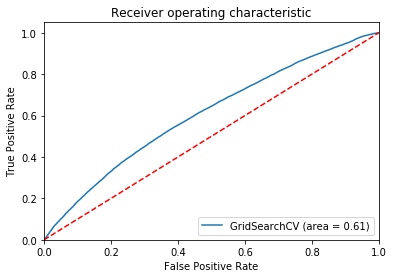

In [17]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [18]:
roc_auc

0.6059340342169606

In [19]:
classes = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("accuracy", accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

accuracy 0.8736542894872311 0.6868801259710893 0.9998377482878175 0.999822441453708 0.9325570188888137 0.8737602519421787 0.6059340342169606


In [20]:
print(metrics.classification_report(classes, y_test))


              precision    recall  f1-score   support

           0       0.00      0.50      0.00        38
           1       1.00      0.87      0.93    133999

    accuracy                           0.87    134037
   macro avg       0.50      0.69      0.47    134037
weighted avg       1.00      0.87      0.93    134037



In [21]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

best_clf = clf.fit(X_train_res, y_train_res)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.2min finished


In [22]:
best_clf.best_estimator_.get_params()['classifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.7759648455277274


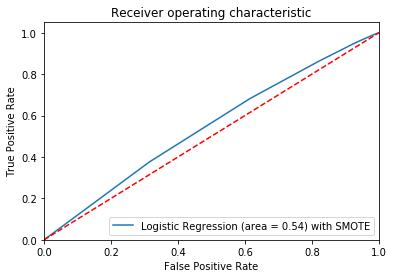

In [24]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f) with SMOTE' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.50      0.00        38
           1       1.00      0.87      0.93    133999

    accuracy                           0.87    134037
   macro avg       0.50      0.69      0.47    134037
weighted avg       1.00      0.87      0.93    134037



In [26]:
from xgboost import XGBClassifier
# fit model on training data
xmodel = XGBClassifier()
xmodel.fit(X_train, y_train)
# make predictions for test data
y_pred = xmodel.predict(X_test)
predictions = [round(value) for value in y_pred]

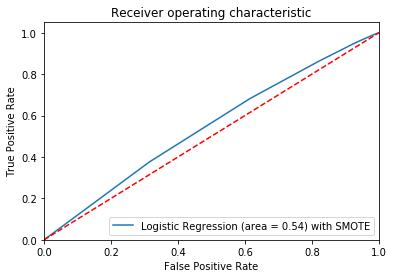

In [27]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f) with SMOTE' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.50      0.00        38
           1       1.00      0.87      0.93    133999

    accuracy                           0.87    134037
   macro avg       0.50      0.69      0.47    134037
weighted avg       1.00      0.87      0.93    134037



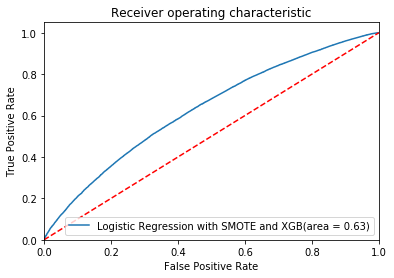

In [29]:
probs = xmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with SMOTE and XGB(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.50      0.00        38
           1       1.00      0.87      0.93    133999

    accuracy                           0.87    134037
   macro avg       0.50      0.69      0.47    134037
weighted avg       1.00      0.87      0.93    134037



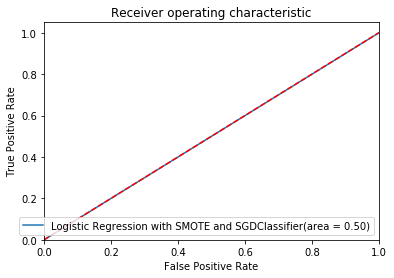

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17, max_iter=25)
sgd_logit.fit(X_train_scaled, y_train)

probs = sgd_logit.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with SMOTE and SGDClassifier(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

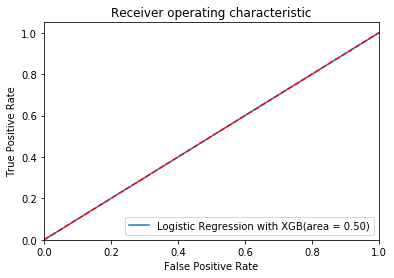

In [32]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with XGB(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.00      0.50      0.00        38
           1       1.00      0.87      0.93    133999

    accuracy                           0.87    134037
   macro avg       0.50      0.69      0.47    134037
weighted avg       1.00      0.87      0.93    134037



In [48]:
target_small = np.asarray(target.sample(frac=0.5))
features_bin_weights_small = np.asarray(features_bin_weights.sample(frac=0.5))

import statsmodels.api as stats
model = stats.Probit(target_small,features_bin_weights_small).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.440725
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:               335092
Model:                         Probit   Df Residuals:                   335085
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                 -0.1618
Time:                        20:05:34   Log-Likelihood:            -1.4768e+05
converged:                       True   LL-Null:                   -1.2711e+05
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0227      0.000     87.483      0.000       0.022       0.023
x2            -0.0472      0.

In [35]:
features_bin_weights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670185 entries, 1126064 to 1283278
Data columns (total 7 columns):
loan_amnt_bin_value         670185 non-null float64
purpose_bin_value           670185 non-null float64
housing_bin_value           670185 non-null float64
annual_inc_bin_value        670185 non-null float64
revol_bal_bin_value         670185 non-null float64
dti_bin_value               670185 non-null float64
inq_last_6mths_bin_value    670185 non-null float64
dtypes: float64(7)
memory usage: 40.9 MB


In [36]:
target_small = np.asarray(target.sample(frac=0.5))
features_bin_weights_small = np.asarray(features_bin_weights.sample(frac=0.5))

import statsmodels.api as stats
model = stats.Logit(target_small,features_bin_weights_small).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.436167
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               335092
Model:                          Logit   Df Residuals:                   335085
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                 -0.1568
Time:                        19:50:32   Log-Likelihood:            -1.4616e+05
converged:                       True   LL-Null:                   -1.2635e+05
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0428      0.000     89.330      0.000       0.042       0.044
x2            -0.0824      0.

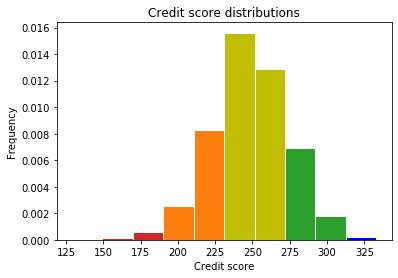

In [49]:
plt.title('Credit score distributions')
plt.xlabel("Credit score")
plt.ylabel("Frequency")
n, bin, patches = plt.hist(data.score, density=True, ec='white', color='b')
patches[1].set_fc('tab:red')
patches[2].set_fc('tab:red')
patches[3].set_fc('tab:orange')
patches[4].set_fc('tab:orange')
patches[5].set_fc('y')
patches[6].set_fc('y')
patches[7].set_fc('tab:green')
patches[8].set_fc('tab:green')
plt.show()

In [50]:
bins=pd.cut(data.score, 7, retbins=True, precision=0)
#bins
#array([123.796, 149.5  , 175.   , 200.5  , 226.   , 251.5  , 277. 302.5  , 328.   ]))

In [51]:
data.score.mean()

247.87178324004574